In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import scipy.stats as stats #for hypothesis testing
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv(r'C:\Users\Jasmine\Downloads\data.csv')
data.head()

,id,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   id         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [5]:
data.describe()

,id,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [15]:
#t-test
# Segregate data based on default payment status
default_0_data = data[data['default'] == 0]
default_1_data = data[data['default'] == 1]

# Select numerical variables
numerical_vars = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']  

# Perform t-tests for difference of means
for var in numerical_vars:
    group_0_values = default_0_data[var]
    group_1_values = default_1_data[var]
    
    # Perform the t-test
    t_statistic, p_value = stats.ttest_ind(group_0_values, group_1_values)
    
    print(f"T-test for {var}:")
    print(f"T-statistic: {t_statistic:.4f}")
    print(f"P-value: {p_value:.4f}")
    print("")


T-test for LIMIT_BAL:
T-statistic: 26.9085
P-value: 0.0000

T-test for AGE:
T-statistic: -2.4059
P-value: 0.0161

T-test for BILL_AMT1:
T-statistic: 3.4030
P-value: 0.0007

T-test for BILL_AMT2:
T-statistic: 2.4585
P-value: 0.0140

T-test for BILL_AMT3:
T-statistic: 2.4381
P-value: 0.0148

T-test for BILL_AMT4:
T-statistic: 1.7592
P-value: 0.0786

T-test for BILL_AMT5:
T-statistic: 1.1709
P-value: 0.2416

T-test for BILL_AMT6:
T-statistic: 0.9305
P-value: 0.3521

T-test for PAY_AMT1:
T-statistic: 12.6651
P-value: 0.0000

T-test for PAY_AMT2:
T-statistic: 10.1632
P-value: 0.0000

T-test for PAY_AMT3:
T-statistic: 9.7580
P-value: 0.0000

T-test for PAY_AMT4:
T-statistic: 9.8584
P-value: 0.0000

T-test for PAY_AMT5:
T-statistic: 9.5619
P-value: 0.0000

T-test for PAY_AMT6:
T-statistic: 9.2244
P-value: 0.0000



In [13]:
#chi square contingency of categorical variables
# Select the categorical variables for the chi-square test
categorical_vars = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# Perform the chi-square test of independence for each variable pair
# Perform the chi-square test of independence for each variable
for var in categorical_vars:
    contingency_table = pd.crosstab(data[var], data['default'])
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    
    print(f"Variable: {var}")
    print(f"Chi-square statistic: {chi2:.4f}")
    print(f"P-value: {p_value:.4f}")
    print(f"Degrees of freedom: {dof}")
    print("")

Variable: SEX
Chi-square statistic: 47.7088
P-value: 0.0000
Degrees of freedom: 1

Variable: EDUCATION
Chi-square statistic: 163.2166
P-value: 0.0000
Degrees of freedom: 6

Variable: MARRIAGE
Chi-square statistic: 35.6624
P-value: 0.0000
Degrees of freedom: 3

Variable: PAY_0
Chi-square statistic: 5365.9650
P-value: 0.0000
Degrees of freedom: 10

Variable: PAY_2
Chi-square statistic: 3474.4668
P-value: 0.0000
Degrees of freedom: 10

Variable: PAY_3
Chi-square statistic: 2622.4621
P-value: 0.0000
Degrees of freedom: 10

Variable: PAY_4
Chi-square statistic: 2341.4699
P-value: 0.0000
Degrees of freedom: 10

Variable: PAY_5
Chi-square statistic: 2197.6949
P-value: 0.0000
Degrees of freedom: 9

Variable: PAY_6
Chi-square statistic: 1886.8353
P-value: 0.0000
Degrees of freedom: 9



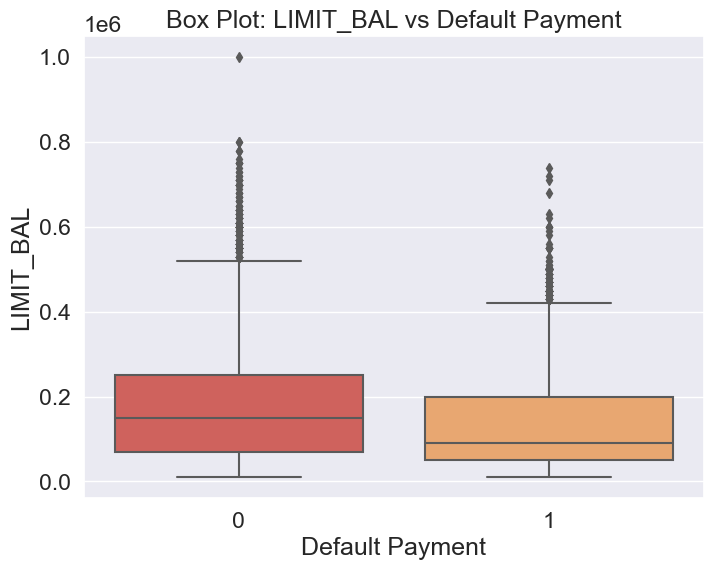

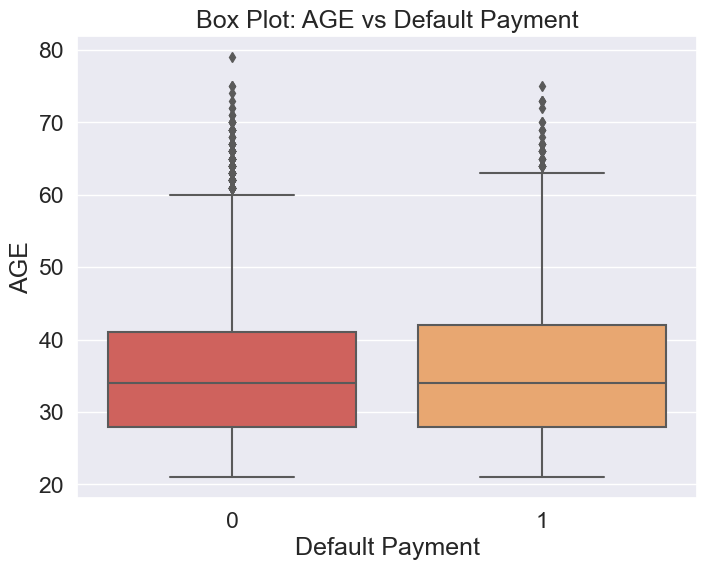

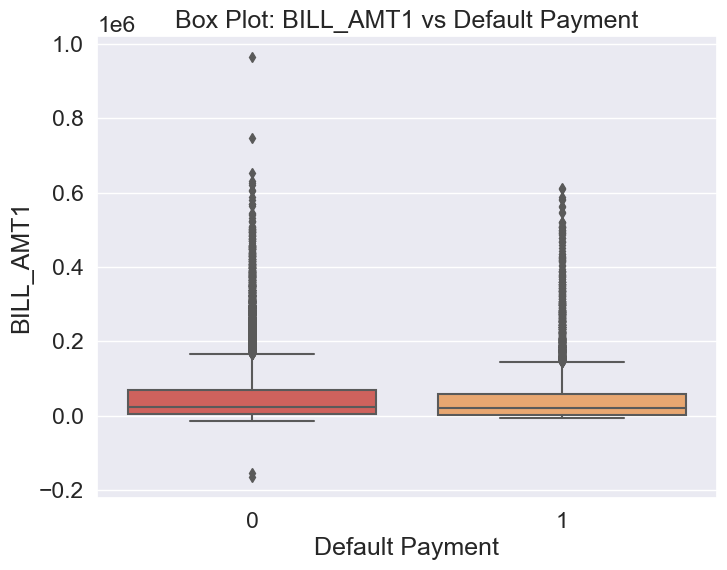

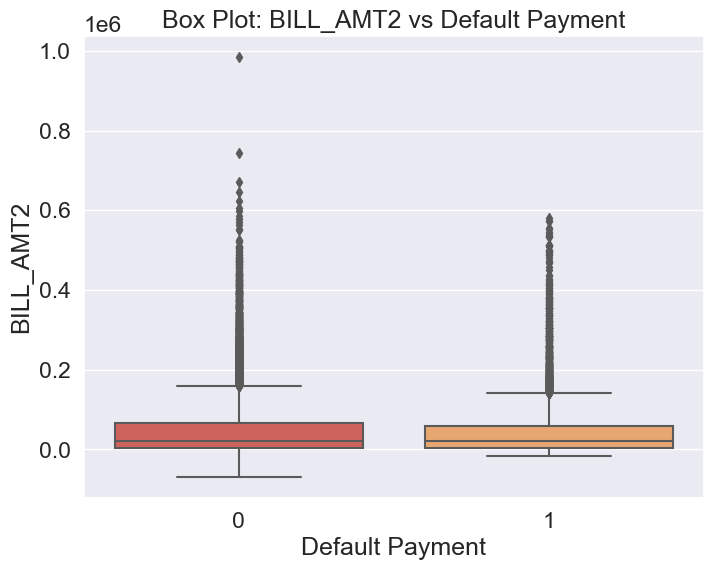

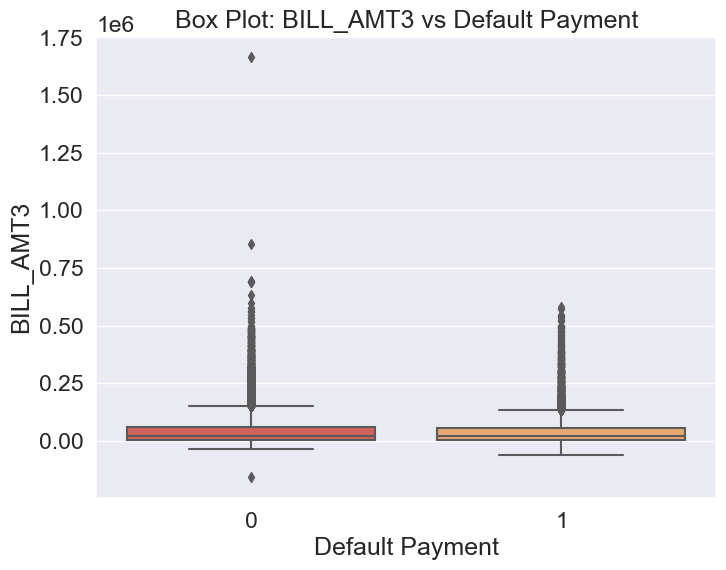

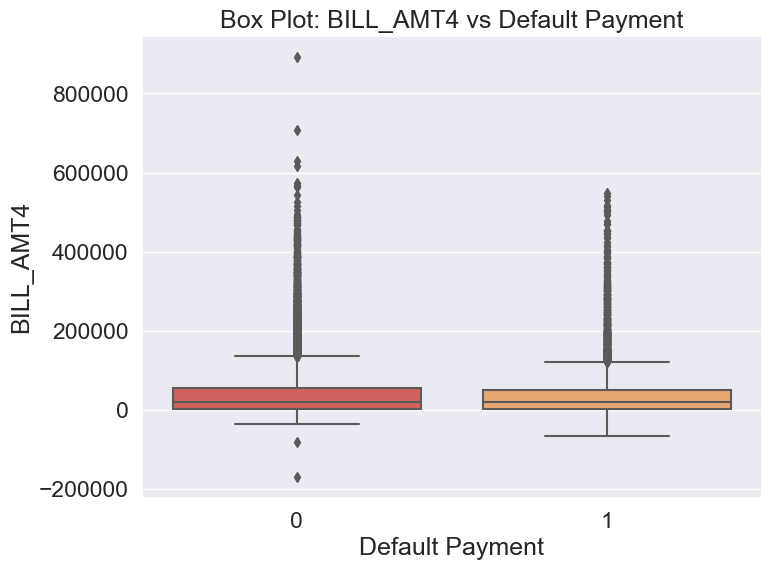

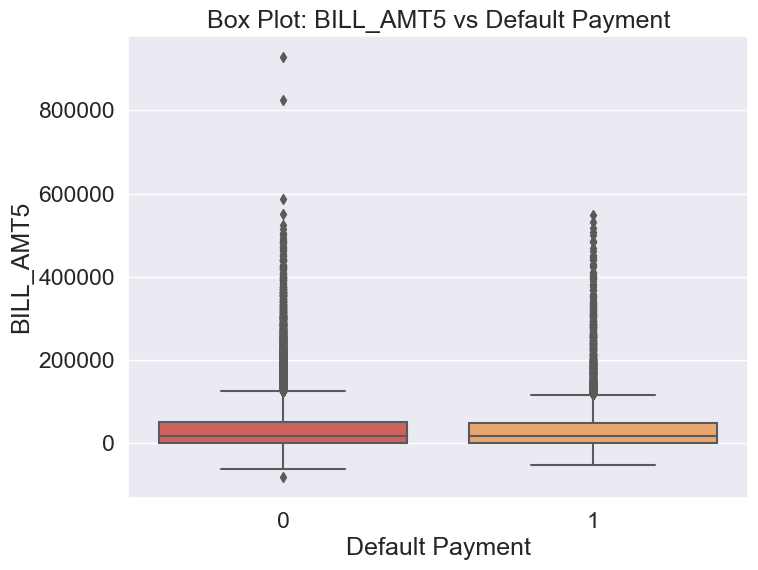

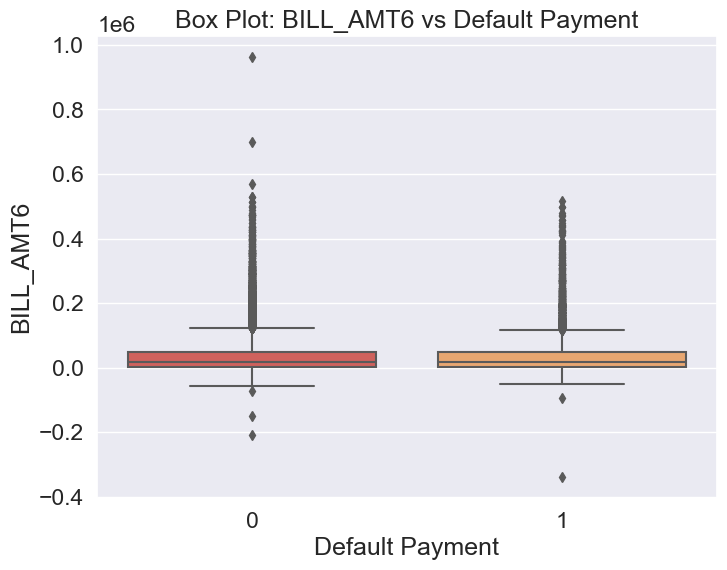

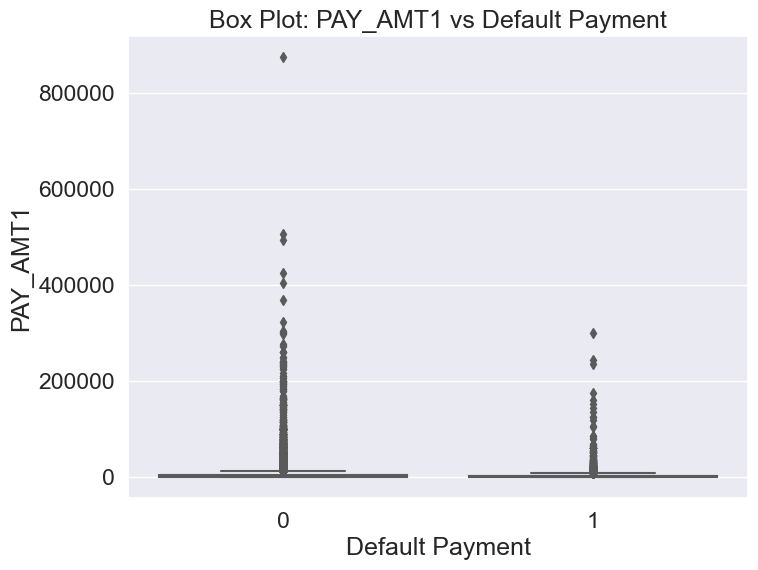

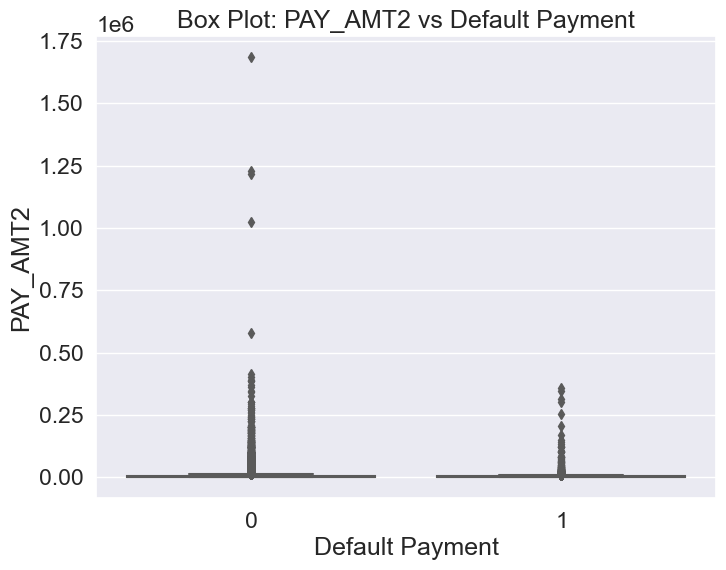

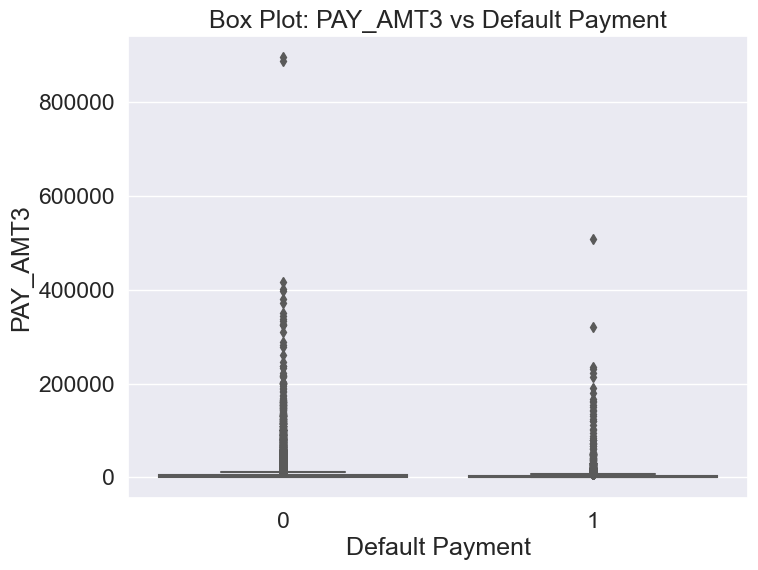

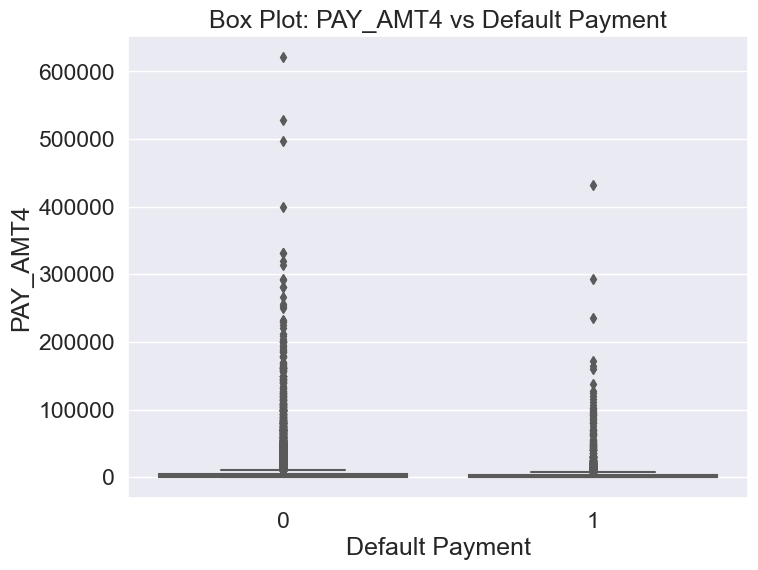

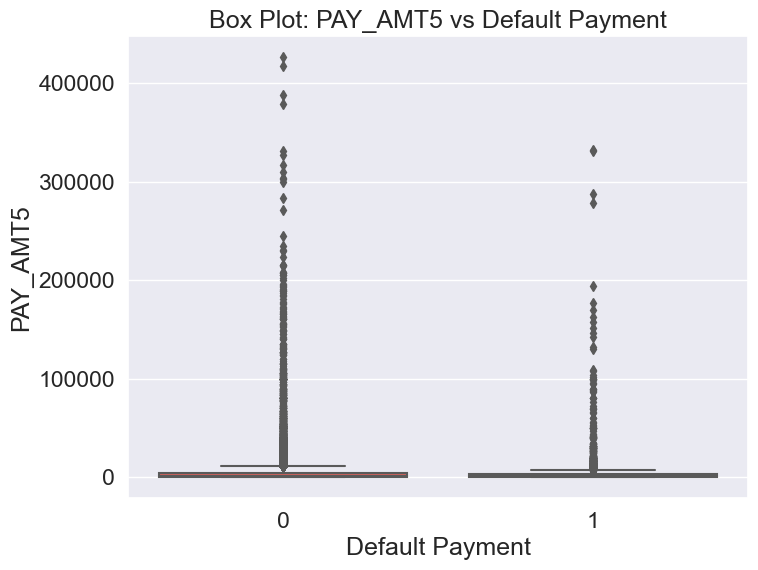

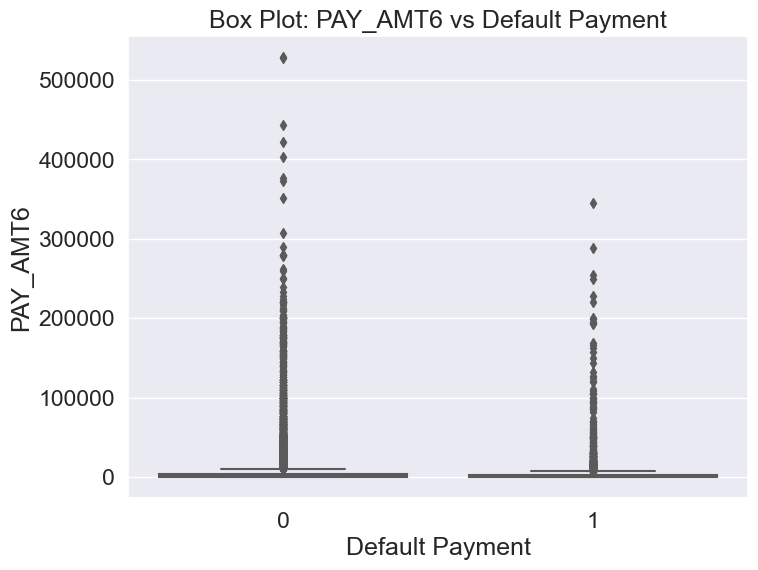

In [6]:
# box plot between default and each numerical predictor variable
# Select predictor variables
predictor_vars = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

# Create box plots for each predictor variable
for var in predictor_vars:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='default', y=var, data=data)
    plt.xlabel('Default Payment')
    plt.ylabel(var)
    plt.title(f"Box Plot: {var} vs Default Payment")
    plt.show()

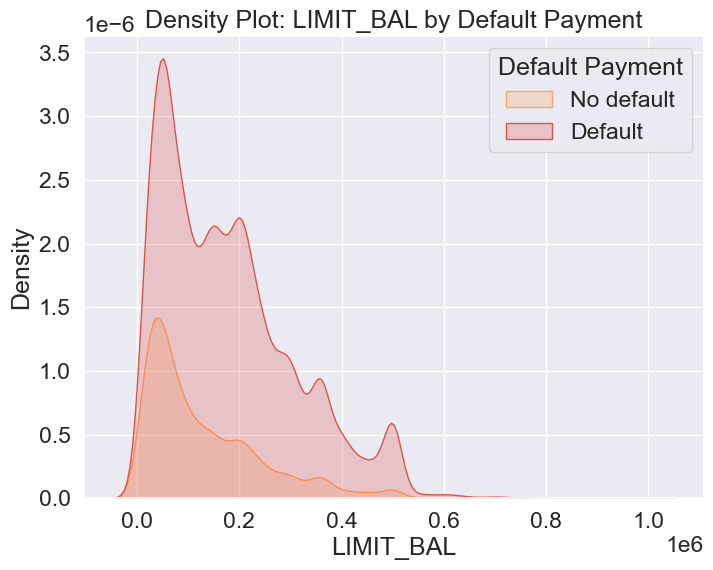

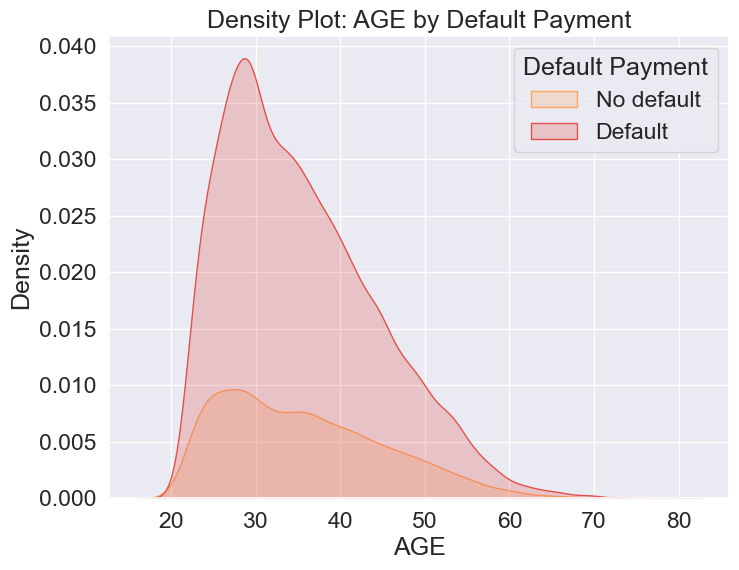

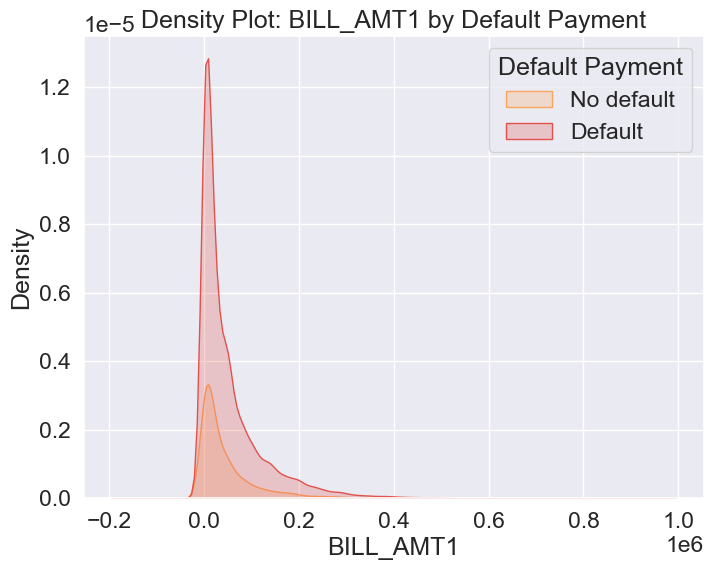

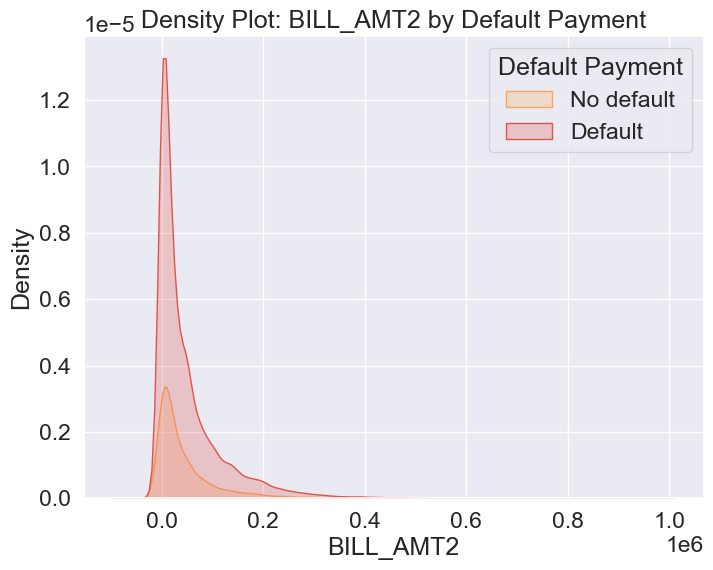

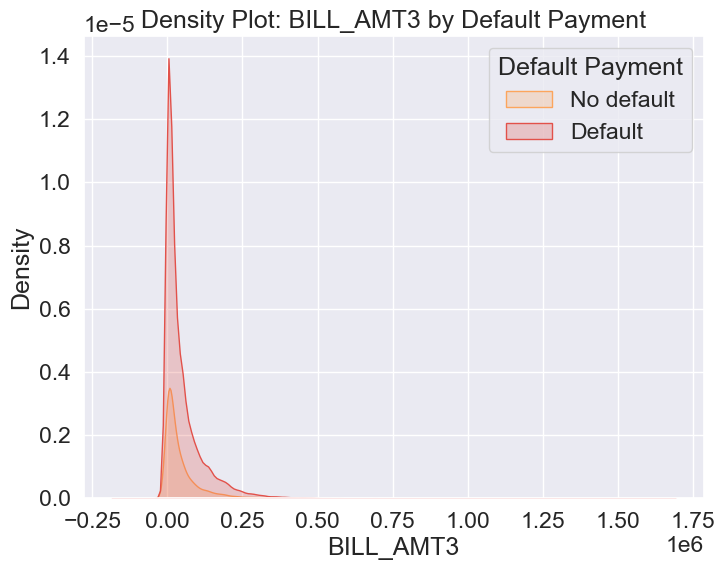

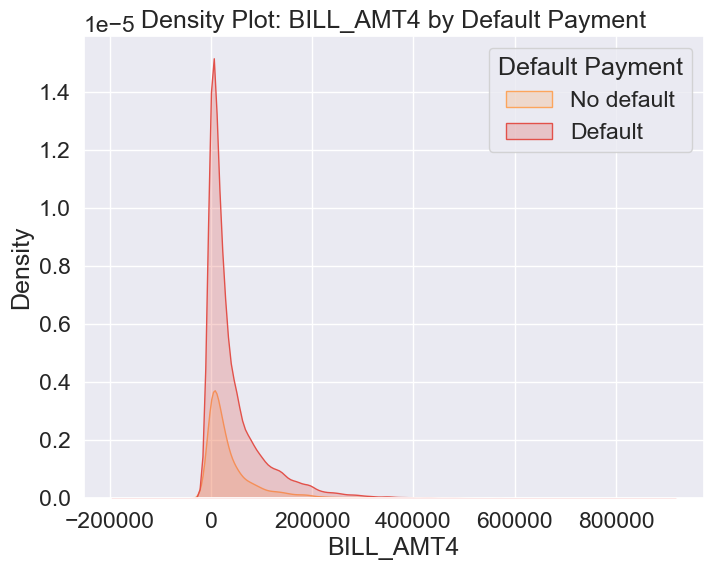

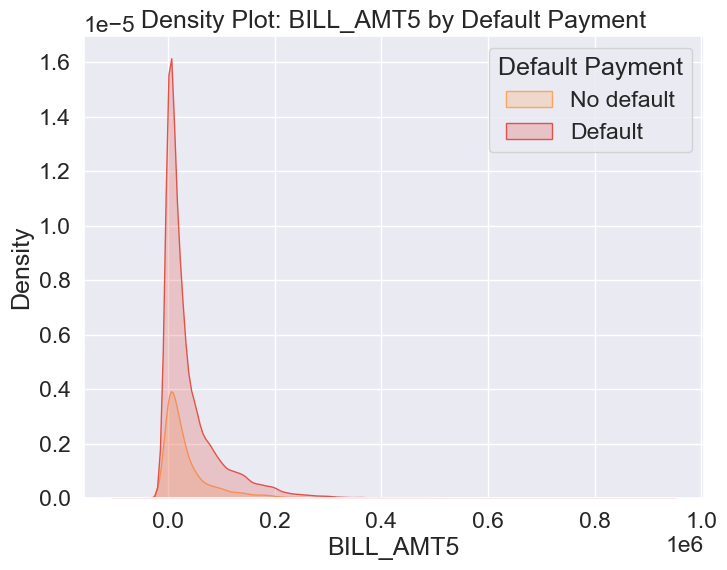

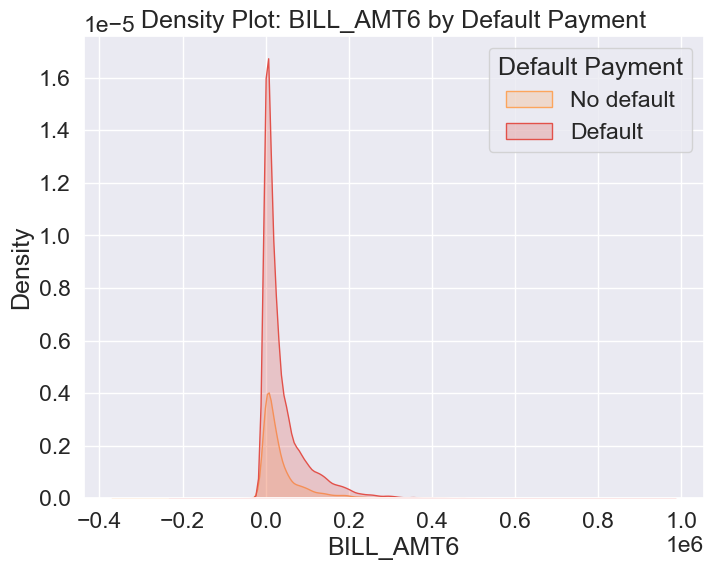

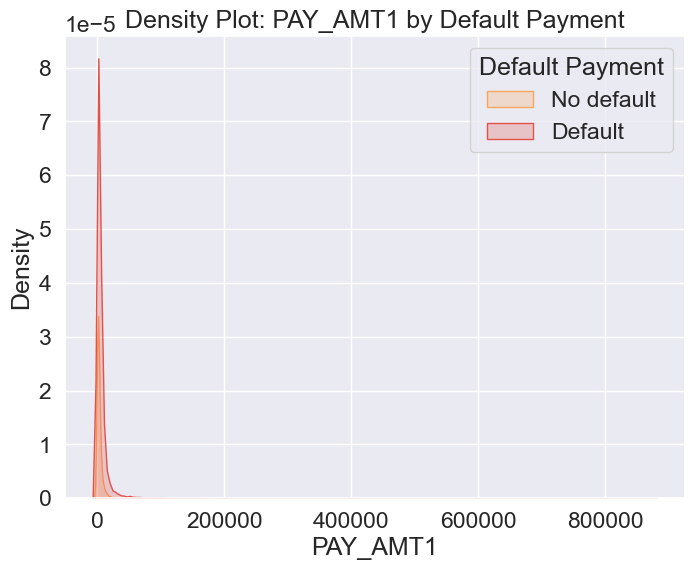

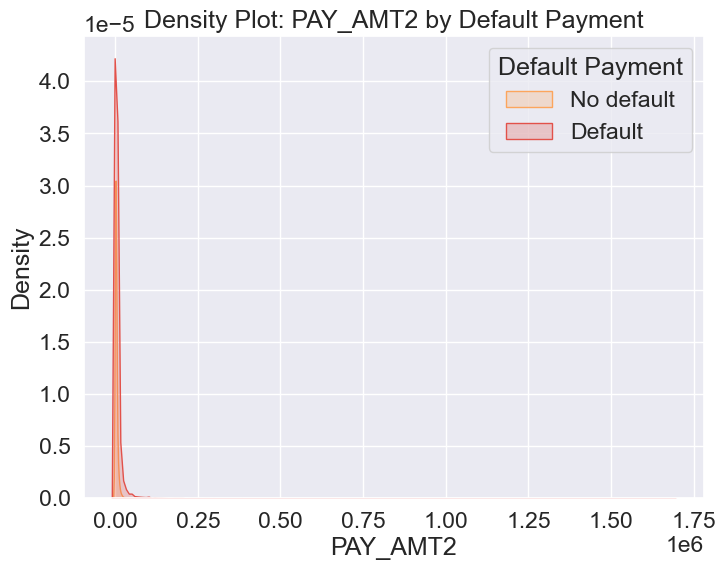

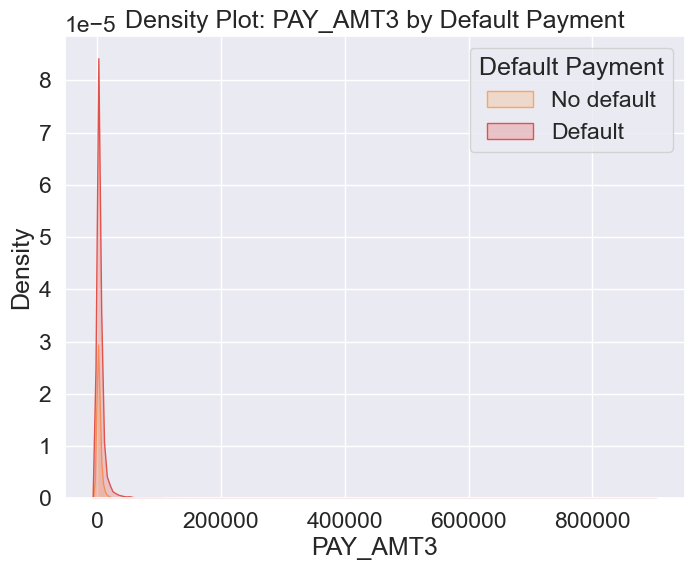

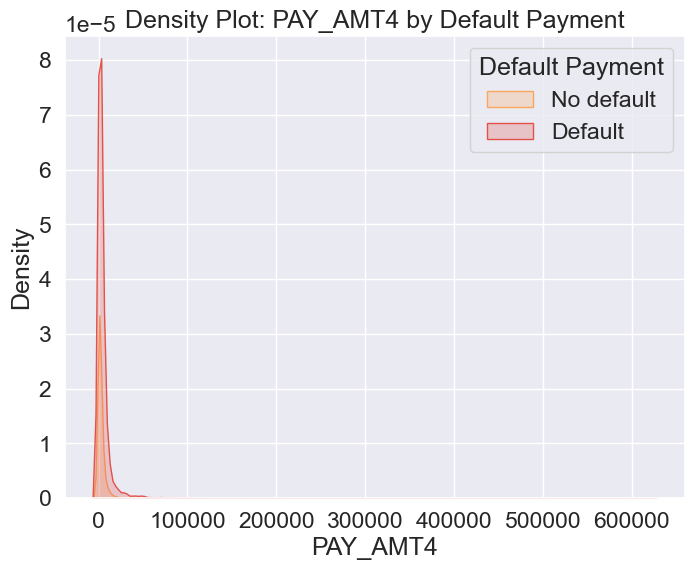

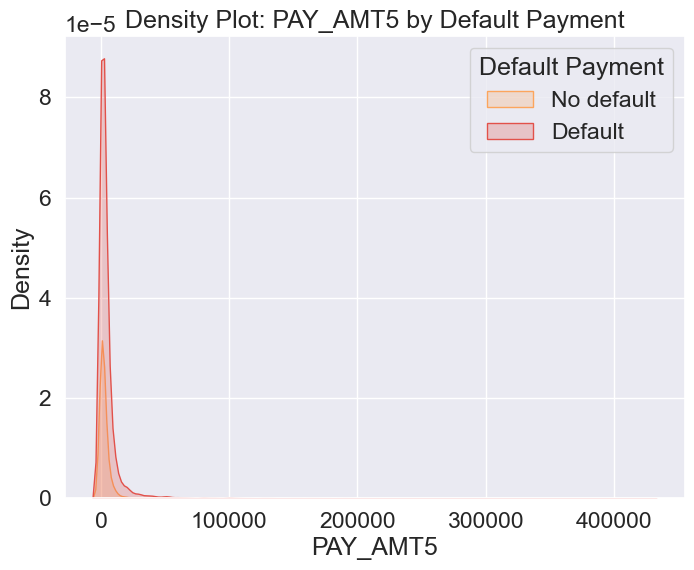

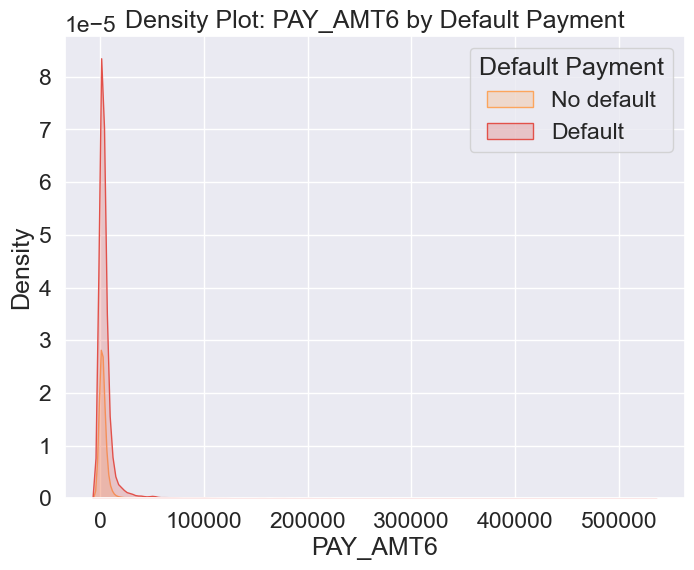

In [26]:
# Create density plots for each predictor variable
for var in predictor_vars:
    plt.figure(figsize=(8, 6))
    ax = sns.kdeplot(data=data, x=var, hue='default', hue_order=[0,1], fill=True)
    plt.xlabel(var)
    plt.ylabel('Density')
    plt.title(f"Density Plot: {var} by Default Payment")
    plt.legend(title='Default Payment', labels=['No default', 'Default'], loc='upper right')
    plt.show()

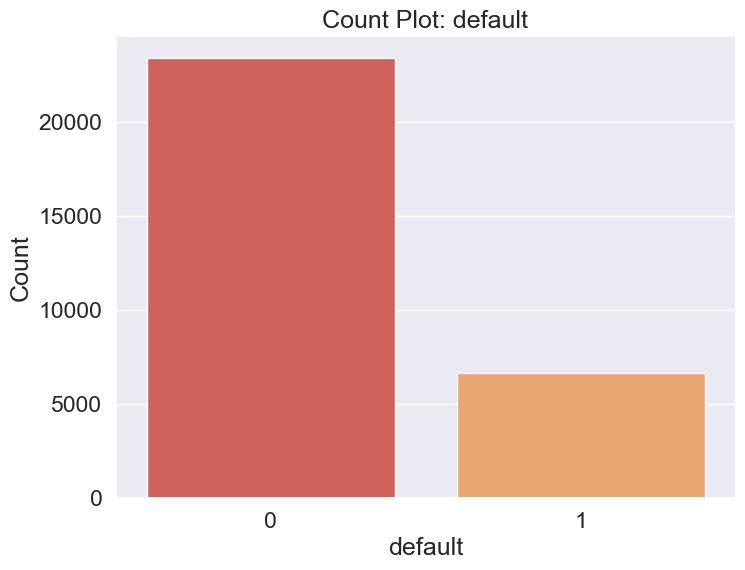

In [10]:
# count plot
variable = 'default'

# Create the count plot
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x=variable)
plt.xlabel(variable)
plt.ylabel('Count')
plt.title(f"Count Plot: {variable}")
plt.show()

In [5]:
data=data.drop(['id'],axis=1)

<Axes: >

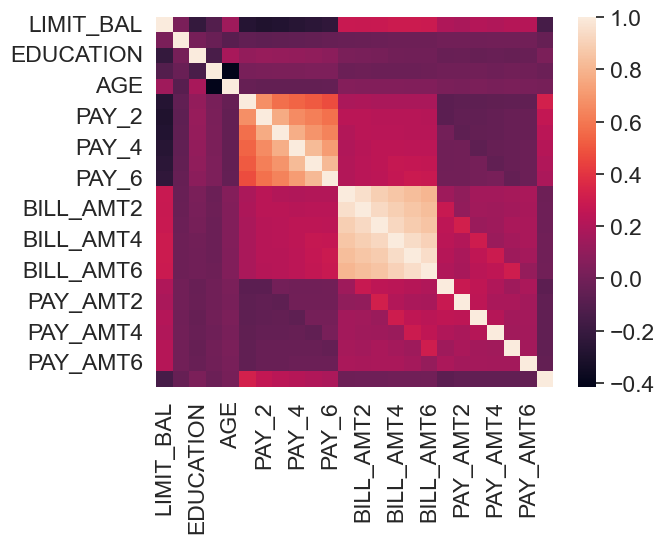

In [6]:
correlation = data. corr ()  
sns. heatmap (correlation)  

In [ ]:
correlation

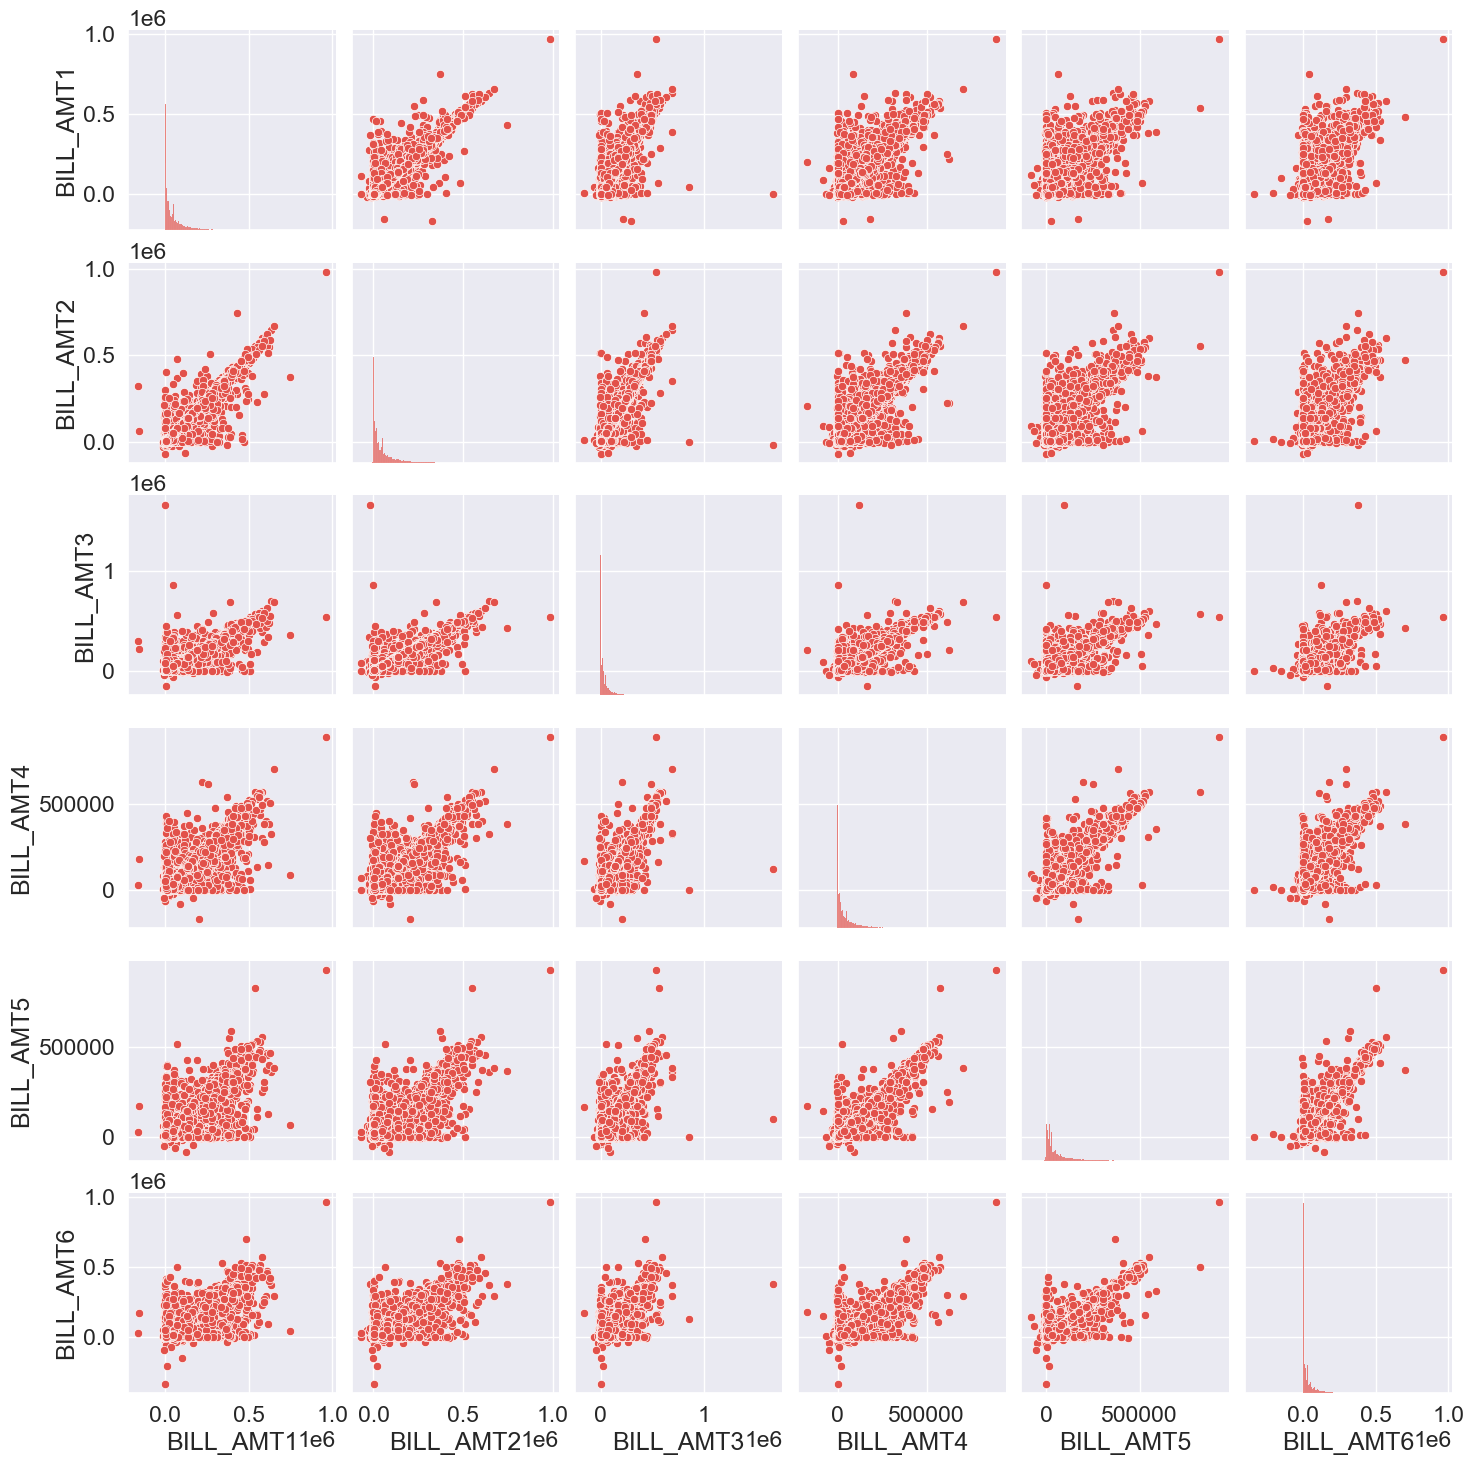

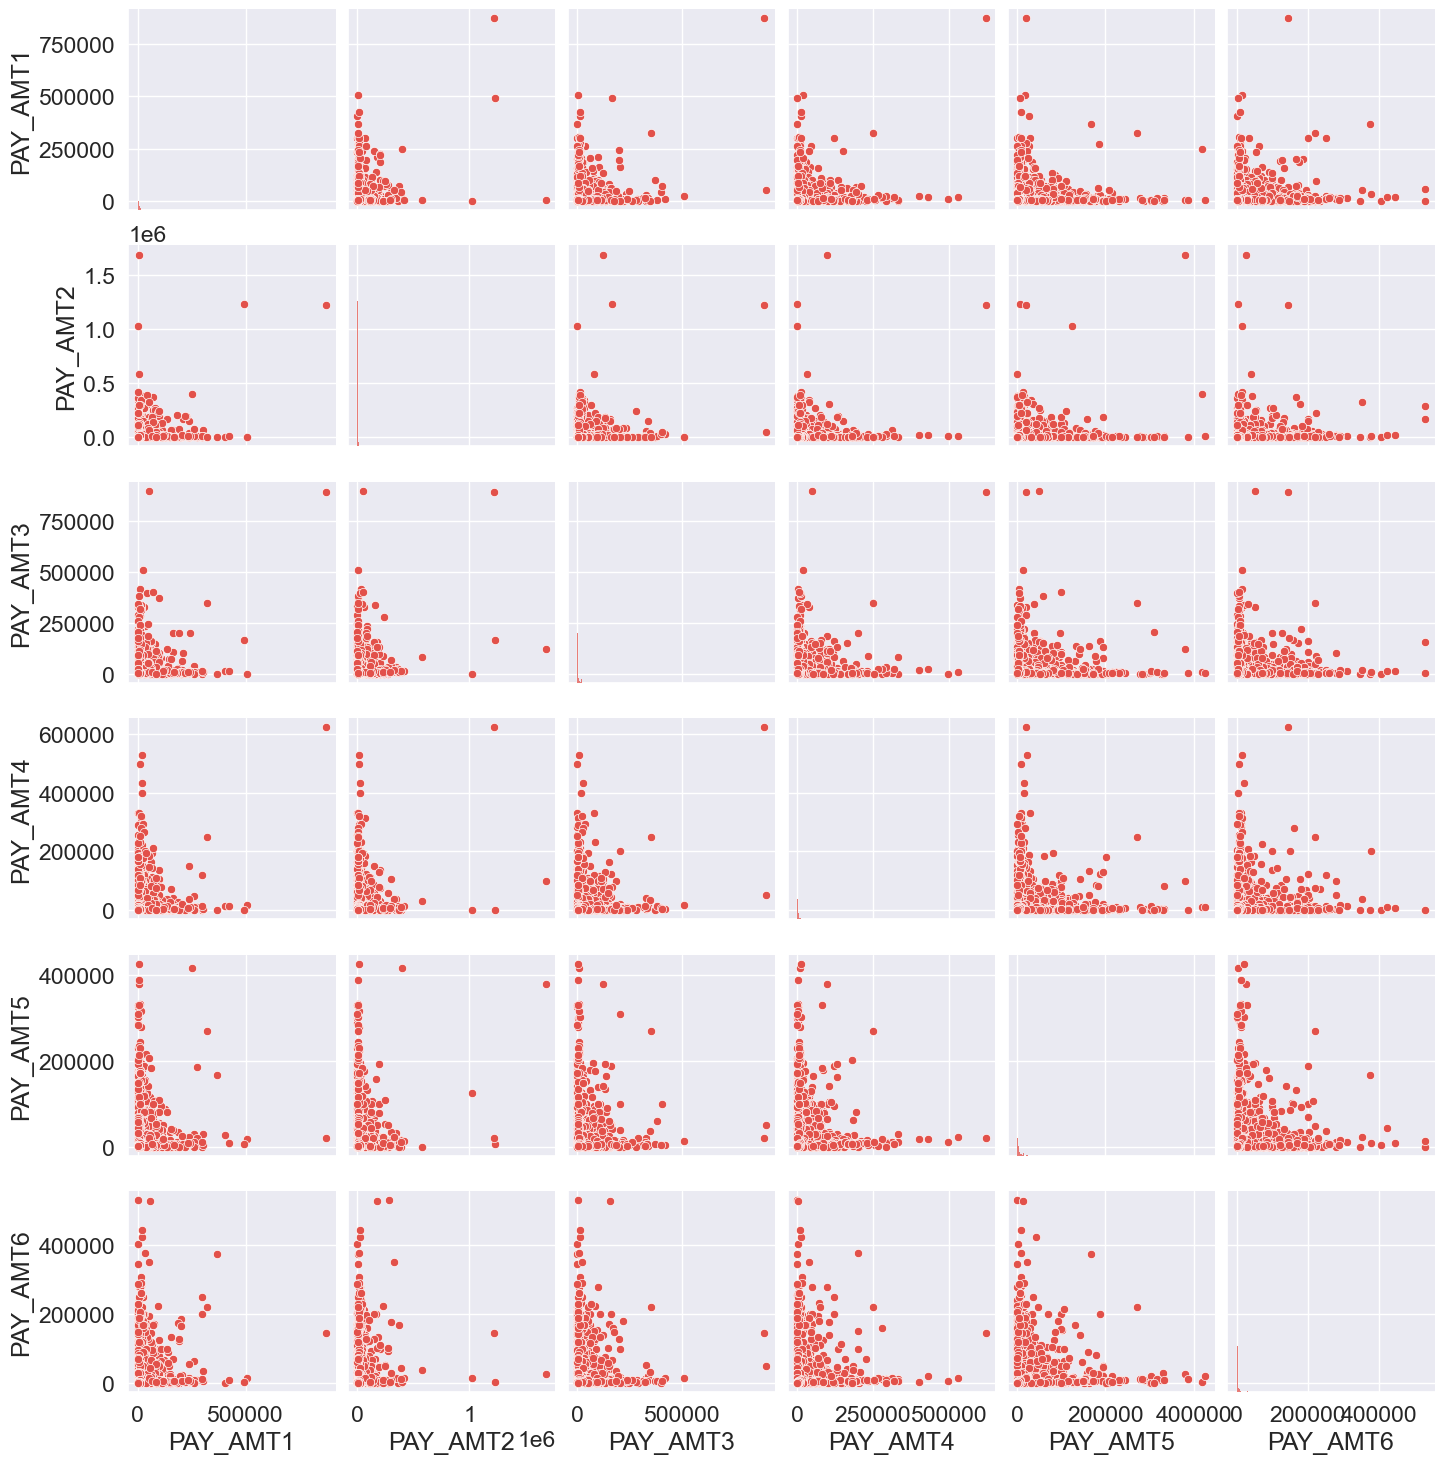

In [7]:
sns.pairplot(data, vars=data.columns[11:17], kind='scatter')
sns.pairplot(data, vars=data.columns[17:23])

In [8]:
col_to_norm = ['LIMIT_BAL', 'SEX', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
              'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

data[col_to_norm]=data[col_to_norm].apply(lambda x: (x-np.mean(x))/np.std(x))

In [9]:
# create dummies for categorical features.
# add 2 to all the values because OneHotEncoder can only handle non-negative values
from sklearn.preprocessing import OneHotEncoder
col_pay = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
data[col_pay] = data[col_pay].apply(lambda x: x+2)

X = data.iloc[:, 0:23]
y = data['default']
enc = OneHotEncoder()
X = enc.fit_transform(X)


In [10]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

In [1]:
data1= data['AGE', 'LIMIT_BAL','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
correlation = data1.corr()
sns.heatmap(correlation, annot=True)

NameError: name 'data' is not defined

In [11]:
y_test

10747    0
12573    1
29676    0
8856     1
21098    0
        ..
3344     1
14405    0
11459    0
15814    0
23883    0
Name: default, Length: 9000, dtype: int64

In [12]:
# Define function to optimize model based on roc_auc 
# (for unbalanced classes, roc_auc makes more sence since the accuracy score can be fooled by only predicting 0)
from sklearn.model_selection import GridSearchCV
def gridsearch(model, params):
    gs = GridSearchCV(model, params, scoring='roc_auc', n_jobs=-1)
    gs.fit(X_train, y_train)
    print('Best params: ', gs.best_params_)
    print('Best auc on training set: ', gs.best_score_)
    print('Best auc on test set: ', gs.score(X_test, y_test))
    return gs.predict(X_test), gs.decision_function(X_test)

In [13]:
# Define function to generate confusion matrix

def plot_confusion(prediction):
    conmat = np.array(confusion_matrix(y_test, prediction, labels=[1,0]))
    confusion = pd.DataFrame(conmat, index=['default', 'not default'], 
                             columns=['predicted default', 'predicted not default'])
    print(confusion)

In [14]:
def plot_roc(prob):
    y_score = prob
    fpr = dict()
    tpr = dict()
    roc_auc=dict()
    fpr[1], tpr[1], _ = roc_curve(y_test, y_score)
    roc_auc[1] = auc(fpr[1], tpr[1])

    plt.figure(figsize=[9,7])
    plt.plot(fpr[1], tpr[1], label='Roc curve (area=%0.2f)' %roc_auc[1], linewidth=4)
    plt.plot([1,0], [1,0], 'k--', linewidth=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('false positive rate', fontsize=18)
    plt.ylabel('true positive rate', fontsize=18)
    plt.title('ROC curve for credit default', fontsize=18)
    plt.legend(loc='lower right')
    plt.show()

In [15]:
# try using stochastic gradient descent with logistic loss function
# specify lasso regularization to select features and address multicollinearity issues
from sklearn.linear_model import LogisticRegression, SGDClassifier

sgd = SGDClassifier(loss='log', penalty='l1', learning_rate='optimal')
sgd_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 5.0], 'class_weight': [None, 'balanced']}
sgd.fit(X_train,y_train)
sgd_pred, sgd_prob = gridsearch(sgd, sgd_params)

Best params:  {'alpha': 0.001, 'class_weight': 'balanced'}
Best auc on training set:  0.7654484170788592
Best auc on test set:  0.7624045714285713


In [16]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
sgd = SGDClassifier(loss='log', penalty='l1', learning_rate='optimal', alpha=0.001)
print('accuracy score on training set: ', cross_val_score(sgd, X_train, y_train, n_jobs=-1).mean())
print('accuracy score on testing set: ', accuracy_score(sgd_pred, y_test))

accuracy score on training set:  0.8203333333333334
accuracy score on testing set:  0.782


In [17]:
# create classification report
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, sgd_pred, target_names=['not default', 'default']))

              precision    recall  f1-score   support

 not default       0.87      0.85      0.86      7000
     default       0.51      0.55      0.53      2000

    accuracy                           0.78      9000
   macro avg       0.69      0.70      0.69      9000
weighted avg       0.79      0.78      0.79      9000



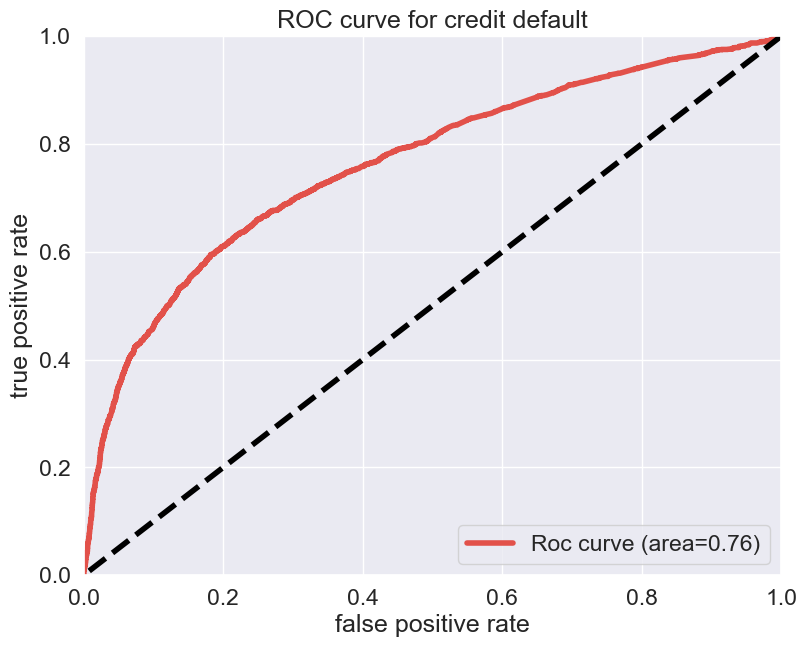

In [18]:
plot_roc(sgd_prob)

In [19]:
# create confusion matrix
plot_confusion(sgd_pred)

             predicted default  predicted not default
default                   1105                    895
not default               1067                   5933


In [20]:
# logistic regression with grid search

lr = LogisticRegression(solver='liblinear')
lr_params = {'C': [0.001, 0.01, 0.1, 1, 10], 'class_weight': [None, 'balanced'], 'penalty': ['l1', 'l2']}

lr_pred, lr_prob = gridsearch(lr, lr_params)

Best params:  {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2'}
Best auc on training set:  0.7696184206317296
Best auc on test set:  0.7705016428571428


In [21]:
# feature selection with the best model from grid search
# roc_auc same as sgdclassifier
from sklearn.feature_selection import RFECV
lr = LogisticRegression(penalty='l2', C=0.1, solver='liblinear', class_weight='balanced')
rfecv = RFECV(estimator=lr, scoring='roc_auc')
model = rfecv.fit(X_train, y_train)
lr_pred = model.predict(X_test)
lr_prob = model.decision_function(X_test)
print('Test score: ', model.score(X_test, y_test))

KeyboardInterrupt: 

In [ ]:
# Check the accuracy score, much worse than sgdclassifier

print('accuracy score on training set: ', cross_val_score(lr, X_train, y_train, n_jobs=-1).mean())
print('accuracy score on testing set: ', accuracy_score(lr_pred, y_test))

In [ ]:
# print confusion matrix
# the model catches more default, but made more mistake in identifying non default at the same time
# So if the bank cares more about identifying people who are going to default (more conservative), 
# this model may be a better choice. If the bank is more aggressive, go for the first one.
plot_confusion(lr_pred)

In [ ]:
# plot roc curve

plot_roc(lr_prob)